In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')

In [48]:
aneugen=set(data[data['Class']=='Aneugen']['Compound_Name'])
clastogen=set(data[data['Class']=='Clastogen']['Compound_Name'])
negative = set(data[data['Class']=='Negative']['Compound_Name'])
print(negative)

{'Staurosporine', '5-Azacytidine', 'DMSO', 'Ciclesonide', 'Azathioprine', 'Sucrose', 'Caffeine', 'Prednisolone', 'Hydrocortisone'}


In [49]:
print(aneugen)

{'Diethylstilbestrol', '(S,R)-Noscapine', 'Vinblastine sulfate', 'Carbendazim', 'Paclitaxel', 'Nocodazole', 'Colchicine'}


In [50]:
print(clastogen)

{'Zidovudine', 'Etoposide', '5-Fluorouracil', 'Cytarabine', 'Temozolomide', 'Chlorambucil', 'Cisplatin', '4-Nitroquinoline N-oxide', 'Ethyl methanesulfonate'}


In [47]:
data = pd.read_csv('normalization1.csv')
toxic = pd.read_csv('toxic_concentration.csv')

In [ ]:
#plot sepecific compound
fig,ax = plt.subplots()
compound_name = 'Paclitaxel'
feature_choose = 'Mitotic_Nuclei_-_Number_of_Objects'
data_compound = data[data['Compound_Name']==compound_name]
plate_list1 = set(data_compound['ScreenName'])

for name in plate_list1:
    negative = data_plate[data_plate['Compound_Name']=='DMSO'][feature_choose].mean()
    toxic_concentration = float(toxic[(toxic['Compound_Name']==compound_name)&(toxic['ScreenName']==name)]['Concentration'])
    selected_data =data_compound[data_compound['ScreenName']==name]
    plt.plot(np.log2(selected_data.iloc[0:15,:]['Concentration']),selected_data.iloc[0:15,:][feature_choose])
    plt.plot(np.log2(selected_data.iloc[15:30,:]['Concentration']),selected_data.iloc[15:30,:][feature_choose])
    plt.axvline(np.log2(toxic_concentration),ls='-',c='red')
plt.xlabel(compound_name)
plt.ylabel(feature_choose)

#fig.savefig('Paclitaxel2.svg',dpi=600,format='svg')

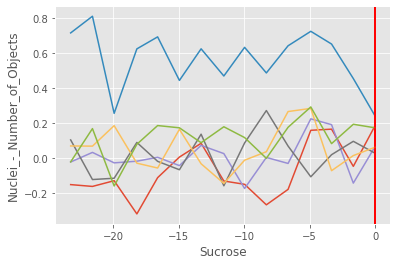

In [86]:
#plot sepecific compound
fig,ax = plt.subplots()
compound_name = 'Sucrose'
feature_choose = 'Nuclei_-_Number_of_Objects'
data_compound = data[data['Compound_Name']==compound_name]
plate_list1 = set(data_compound['ScreenName'])

for name in plate_list1:
    toxic_concentration = float(toxic[(toxic['Compound_Name']==compound_name)&(toxic['ScreenName']==name)]['Concentration'])
    selected_data =data_compound[data_compound['ScreenName']==name]
    plt.plot(np.log2(selected_data.iloc[0:15,:]['Concentration']),selected_data.iloc[0:15,:][feature_choose])
    plt.plot(np.log2(selected_data.iloc[15:30,:]['Concentration']),selected_data.iloc[15:30,:][feature_choose])
    plt.axvline(np.log2(toxic_concentration),ls='-',c='red')
plt.xlabel(compound_name)
plt.ylabel(feature_choose)

fig.savefig('plot4.svg',dpi=600,format='svg')

In [27]:
compound_name = 'Paclitaxel'
feature_choose = 'Nuclei_-_Number_of_Objects'
data_compound = data[data['Compound_Name']==compound_name]
plate_list1 = set(data_compound['PlateName'])
print(plate_list1)

{1081242952, 1074223265, 1081247148}


In [28]:
selected_data = data[(data['Compound_Name']==compound_name)&(data['PlateName']==1081242952)]
print(type(selected_data.iloc[0,:][feature_choose]))
#plt.plot(np.log2(selected_data.iloc[0:15,:]['Concentration']),float(selected_data.iloc[0:15,:][feature_choose]))
#plt.plot(np.log2(selected_data.iloc[15:30,:]['Concentration']),np.log2(selected_data.iloc[15:30,:][feature_choose]/negative

<class 'numpy.float64'>


In [6]:
plate_list = set(data['PlateName'])
negative_list = set(data[(data['Class']=='Negative')& (data['Compound_Name']!='DMSO')]['Compound_Name'])
aneugen_list = set(data[(data['Class']=='Aneugen')& (data['Compound_Name']!='Aneugen')]['Compound_Name'])
clastogen_list = set(data[(data['Class']=='Clastogen')& (data['Compound_Name']!='Clastogen')]['Compound_Name'])

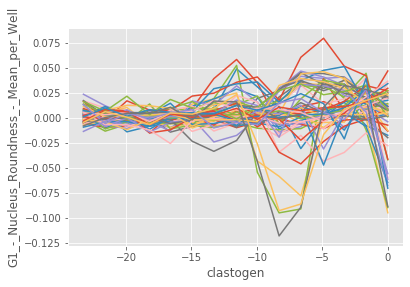

In [37]:
fig,ax = plt.subplots()
feature = 'G1_-_Nucleus_Roundness_-_Mean_per_Well'
for name in plate_list:
    data_plate = data[data['PlateName']==name]
    negative = data_plate[data_plate['Compound_Name']=='DMSO'][feature].mean()
    for i in set(data_plate['Compound_Name']):
        select_data = data_plate[data_plate['Compound_Name']==i]
        if i in clastogen_list:
            plt.plot(np.log2(select_data.iloc[0:15,:]['Concentration']),np.log2(select_data.iloc[0:15,:][feature]/negative))
            plt.plot(np.log2(select_data.iloc[15:30,:]['Concentration']),np.log2(select_data.iloc[15:30,:][feature]/negative))
plt.xlabel('clastogen')
plt.ylabel(feature)
fig.savefig('clastogen2.svg',dpi=600,format='svg')

In [14]:
data1 = data[data['PlateName']==1074223227]
negative = data1[data1['Compound_Name']=='DMSO']['Micronuclei_-_Number_of_Objects'].median()
aneugen = data1[data1['Compound_Name']=='Aneugen']['Micronuclei_-_Number_of_Objects'].mean()
clastogen = data1[data1['Compound_Name']=='Clastogen']['Micronuclei_-_Number_of_Objects'].mean()

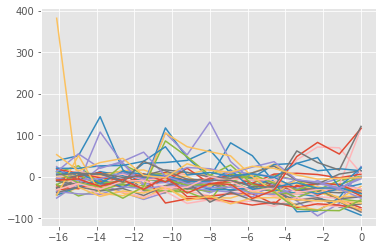

In [21]:
for name in plate_list:
    data_plate = data[data['PlateName']==name]
    negative = data_plate[data_plate['Compound_Name']=='DMSO']['Micronuclei_-_Number_of_Objects'].mean()
    for i in set(data_plate['Compound_Name']):
        select_data = data_plate[data_plate['Compound_Name']==i]
        if i in negative_list:
            plt.plot(np.log(select_data.iloc[0:15,:]['Concentration']),select_data.iloc[0:15,:]['Micronuclei_-_Number_of_Objects']-negative)
            plt.plot(np.log(select_data.iloc[15:30,:]['Concentration']),select_data.iloc[15:30,:]['Micronuclei_-_Number_of_Objects']-negative)
        

In [ ]:

for i in exp_time:
    select_data = data[(data['ScreenName']==i) & (data['Compound_Name']=='Cisplatin')]
    plt.plot(np.log(select_data.iloc[0:15,:]['Concentration']),select_data.iloc[0:15,:]['Micronuclei_-_Number_of_Objects'])
    plt.plot(np.log(select_data.iloc[15:30,:]['Concentration']),select_data.iloc[15:30,:]['Micronuclei_-_Number_of_Objects'])
plt.xlabel('Cisplatin')
plt.ylabel('Micronuclei_-_Number_of_Objects')